<a href="https://colab.research.google.com/github/sw-programmer/Coursework1/blob/main/CW1_Q3_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Coursework 1**

1.   ### **Computationally Efficient Eigenfaces**
2.   ### **Incremental PCA**
3.   ### **PCA-LDA for Face Recognition**
4.   ### **K-means codebook**
5.   ### **RF classifier**


**by 20190223	Soohyun Ryu,	20190247	Sangwoo Park**






**1. Setting!**

In [2]:
import os
import time
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# import datetime
# import math
# import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
mat_file = io.loadmat("/content/drive/MyDrive/CV_ML/CW1/face.mat")
mat_X = mat_file['X']
mat_Y = mat_file['l'][0]

print(mat_file.keys()) 
print(mat_X.shape)                         # 총 52명. 각 10장의 사진. 

dict_keys(['__header__', '__version__', '__globals__', 'X', 'l'])
(2576, 520)


In [5]:
df = pd.DataFrame(data=mat_X).transpose()
df['label'] = mat_Y                         # row -> data, col -> feature
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values                   # Target column

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    stratify=Y, 
                                                    random_state=1004)          
# 얼굴 그룹 비율 유지               
# test/train ratio = 0.2
# random_state -> before dividing, seed for shuffling
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
X_test_mean = np.mean(X_test, axis = 0)
X_train_mean = np.mean(X_train, axis = 0)
np.unique(y_train, return_counts=True)    # 52명의 얼굴이 80%씩 고르게 train set에 들어간 모습

X_train shape: (416, 2576)
X_test shape: (104, 2576)
y_train shape: (416,)
y_test shape: (104,)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52], dtype=uint8),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8]))

In [6]:
# NN Classfication
def NN(X_trained, X_test, y_pred):
  for query in X_test:
    Args = []
    for trained in X_trained:
      Args.append(np.linalg.norm(query - trained))
    y_pred.append(y_train[np.argmin(Args)])
  return accuracy_score(y_test, y_pred), y_pred

# 평균 얼굴 계산 함수 
def AvgCompute(X): 
  Xbar = np.mean(X, axis=0)  
  matrix_A = X - Xbar 
  return matrix_A, Xbar

# 고유값, 고유벡터 계산 함수
def eig(S): 
  eig_vals, eig_vecs = np.linalg.eig(S) 
  sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬 
  return eig_vals[sort_indices], eig_vecs[:, sort_indices]

# Reconstruction에 쓰일 함수
def reconstruct(X, PC): 
  return (X @ PC) @ PC.T

# PCA 과정
def PCA(X, num_components, low_dim = False): # X == train set, num_components == 선택할 eigen vector 개수
  start = time.time()
  N, D = X.shape 
  matrix_A, X_bar = AvgCompute(X)
  if not low_dim:
    S = (matrix_A.T @ matrix_A) / N
  else:
    S = (matrix_A @ matrix_A.T) / N

  eig_vals, eig_vecs = eig(S)
  principal_vals, principal_components = np.real(eig_vals[:num_components]), np.real(eig_vecs[:,:num_components]) 
  
  if low_dim:
    norm = np.linalg.norm(matrix_A.T @ principal_components, axis = 0)
    principal_components = ((matrix_A.T @ principal_components) / norm[np.newaxis, :])

  reconst_X = reconstruct(matrix_A, principal_components) + X_bar 
  comp_time = time.time() - start
  
  return reconst_X, X_bar, principal_vals, principal_components, comp_time

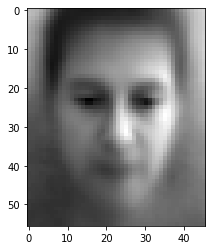

In [7]:
A, X_bar = AvgCompute(X_train) 
A = A.T

plt.imshow(np.reshape(X_bar,(46,56)).T, cmap = 'gist_gray') # 평균 얼굴 출력

## PCA Method


1/91
2/91
3/91
4/91
5/91
6/91
7/91
8/91
9/91
10/91
11/91
12/91
13/91
14/91
15/91
16/91
17/91
18/91
19/91
20/91
21/91
22/91
23/91
24/91
25/91
26/91
27/91
28/91
29/91
30/91
31/91
32/91
33/91
34/91
35/91
36/91
37/91
38/91
39/91
40/91
41/91
42/91
43/91
44/91
45/91
46/91
47/91
48/91
49/91
50/91
51/91
52/91
53/91
54/91
55/91
56/91
57/91
58/91
59/91
60/91
61/91
62/91
63/91
64/91
65/91
66/91
67/91
68/91
69/91
70/91
71/91
72/91
73/91
74/91
75/91
76/91
77/91
78/91
79/91
80/91
81/91
82/91
83/91
84/91
85/91
86/91
87/91
88/91
89/91
90/91
91/91


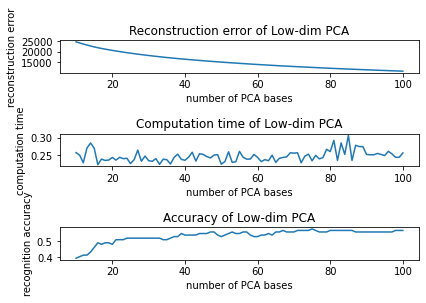

average computation time = 0.24767237443190354


In [10]:
# number of PCA bases 바꾸면서 reconstruction error 측정
max_num = 100
start_num = 10
error_list = []
computation_time = []
accuracy = []

os.makedirs("./PCA_org", exist_ok=True)
os.makedirs("./PCA_low_dim", exist_ok=True)

# Original PCA / Low-dim PCA
low_dim=True
# low_dim=True
if low_dim:
    root_path = "./PCA_low_dim"
else:
    root_path = "./PCA_org"

for i in range(start_num, max_num+1):
    reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X_train, i, low_dim)
    recon_loss = np.linalg.norm((X_train - reconst_X), None)
    error_list.append(recon_loss)
    acc, y_predd = NN((X_train - X_bar) @ principal_components, (X_test - X_test_mean) @ principal_components, [])
    accuracy.append(acc)
    computation_time.append(comp_time)
    # To see the reconstructed images
    plt.imsave(f"{root_path}/{i}_recon.png", np.reshape(reconst_X[0,:],(46,56)).T, cmap = 'gist_gray')
    print(f"{i-start_num+1}/{max_num-start_num+1}")

if not low_dim:
    PCA_name = "Original PCA"
else:
    PCA_name = "Low-dim PCA"

x_axis = list(range(start_num, max_num+1))
fig_recon, ax_recon = plt.subplots(3,1)
ax_recon[0].plot(x_axis, error_list)
ax_recon[0].set_xlabel("number of PCA bases")
ax_recon[0].set_ylabel("reconstruction error")
ax_recon[0].set_title(f"Reconstruction error of {PCA_name}")

ax_recon[1].plot(x_axis, computation_time)
ax_recon[1].set_xlabel("number of PCA bases")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time of {PCA_name}")

ax_recon[2].plot(x_axis, accuracy)
ax_recon[2].set_xlabel("number of PCA bases")
ax_recon[2].set_ylabel("recognition accuracy")
ax_recon[2].set_title(f"Accuracy of {PCA_name}")

fig_recon.tight_layout(pad=1.0)

plt.show()

print(f"average computation time = {np.mean(computation_time)}")

In [11]:
print(principal_components.shape)

(2576, 100)


## PCA-LDA Method

In [20]:
def LDA(X, pc, num_lda): 
  sort_indices = np.argsort(y_train)
  undo_indices = np.argsort(sort_indices)
  y_train_sorted = y_train[sort_indices]
  X_train_sorted = X_train[sort_indices]

  meanlist = []
  j = 0
  for i in range(52):
    mean = np.mean(X_train_sorted[j:j+8,:], axis=0)
    meanlist.append(mean)
    j = j+8  

  start = time.time()
  # Between class scatter matrix
  mean_global = np.mean(meanlist, axis = 0)
  meanlist_sub = np.array([(i-mean_global) for i in meanlist])
  S_bet = 8 * meanlist_sub.T @ meanlist_sub

  # Within class scatter matrix
  within_sub = []
  j=0
  for i in range(52):
    within_sub.append(np.subtract(X_train_sorted[j:j+8,:], meanlist[i]))
    j = j+8
  within_sub = np.array([(i.T @ i) for i in within_sub])
  S_with = np.sum(within_sub, axis = 0)

  if(np.linalg.matrix_rank(pc) < pc.shape[1]):
    pc = np.unique(pc, axis=1)
    print(f"rank of feature matrix is {np.linalg.matrix_rank(pc)}")
  else:
    pass
  
  # print(f"Rank of S_between : {np.linalg.matrix_rank(S_bet)}")
  # print(f"Rank of S_within : {np.linalg.matrix_rank(S_with)}")

  # 1. PCA
  S_bet_PCA = pc.T @ S_bet @ pc
  S_with_PCA = pc.T @ S_with @ pc

  # 2. LDA
  discriminant_vals, discriminant_components = eig((np.linalg.inv(S_with_PCA) @ S_bet_PCA))
  discriminant_vals, discriminant_components = np.real(discriminant_vals[:num_lda]), np.real(discriminant_components[:,:num_lda]) 
  
  comp_time = time.time() - start

  return discriminant_components, discriminant_vals, pc, comp_time


def PCA_LDA(X, num_pca, num_lda):
  reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X, num_pca, True)
  return LDA(X, principal_components, num_lda)

In [8]:
import torch
torch.cuda.is_available()

True

In [34]:
# hyper-param 바꾸면서 accuracy 측정
M_pca = 364
M_lda = 51
pca_start_num = 51
lda_start_num = 10
accuracy_list = []
computation_time = []
memory_usage = []

# Original PCA / Low-dim PCA
low_dim=True
PCA_name = "Low-dim PCA"

# First, find optimal M_pca
for i in range(pca_start_num, M_pca+1):
  discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, i, M_lda)
  computation_time.append(comp_time)
  X_train_pca = (X_train - X_bar) @ principal_components_lda
  X_test_pca = (X_test - X_test_mean) @ principal_components_lda
  result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
  accuracy_list.append(result)
  if i % 10 == 0:
    print(f"M_pca : {i-pca_start_num+1}/{M_pca-pca_start_num+1}")

# print(f"average computation time = {np.mean(computation_time)}")

M_pca : 10/314
M_pca : 20/314
M_pca : 30/314
M_pca : 40/314
M_pca : 50/314
M_pca : 60/314
M_pca : 70/314
M_pca : 80/314
M_pca : 90/314
M_pca : 100/314
M_pca : 110/314
M_pca : 120/314
M_pca : 130/314
M_pca : 140/314
M_pca : 150/314
M_pca : 160/314
M_pca : 170/314
M_pca : 180/314
M_pca : 190/314
M_pca : 200/314
M_pca : 210/314
M_pca : 220/314
M_pca : 230/314
M_pca : 240/314
M_pca : 250/314
M_pca : 260/314
M_pca : 270/314
M_pca : 280/314
M_pca : 290/314
M_pca : 300/314
M_pca : 310/314


average computation time = 3.1903776838665916


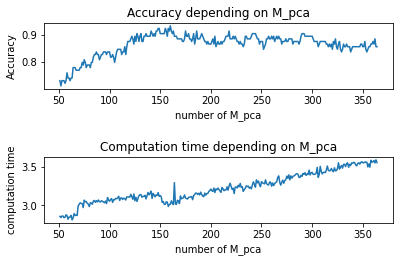

In [45]:
x_axis = list(range(pca_start_num, M_pca+1))
fig_recon, ax_recon = plt.subplots(2,1)
ax_recon[0].plot(x_axis, accuracy_list)
ax_recon[0].set_xlabel("number of M_pca")
ax_recon[0].set_ylabel("Accuracy")
ax_recon[0].set_title(f"Accuracy depending on M_pca")

ax_recon[1].plot(x_axis, computation_time)
ax_recon[1].set_xlabel("number of M_pca")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time depending on M_pca")

fig_recon.tight_layout(pad=2.0)
print(f"average computation time = {np.mean(computation_time_lda)}")

In [46]:
Optimal_M_pca = np.argmax(accuracy_list) + 51
print(Optimal_M_pca)

160


M_lda : 1/42
M_lda : 2/42
M_lda : 3/42
M_lda : 4/42
M_lda : 5/42
M_lda : 6/42
M_lda : 7/42
M_lda : 8/42
M_lda : 9/42
M_lda : 10/42
M_lda : 11/42
M_lda : 12/42
M_lda : 13/42
M_lda : 14/42
M_lda : 15/42
M_lda : 16/42
M_lda : 17/42
M_lda : 18/42
M_lda : 19/42
M_lda : 20/42
M_lda : 21/42
M_lda : 22/42
M_lda : 23/42
M_lda : 24/42
M_lda : 25/42
M_lda : 26/42
M_lda : 27/42
M_lda : 28/42
M_lda : 29/42
M_lda : 30/42
M_lda : 31/42
M_lda : 32/42
M_lda : 33/42
M_lda : 34/42
M_lda : 35/42
M_lda : 36/42
M_lda : 37/42
M_lda : 38/42
M_lda : 39/42
M_lda : 40/42
M_lda : 41/42
M_lda : 42/42


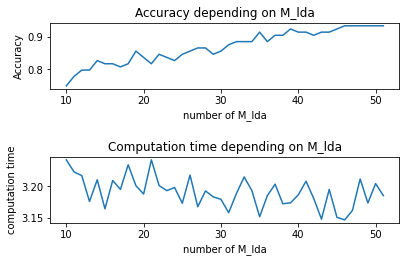

In [42]:
# And then find best M_lda with optimal M_pca
accuracy_list_lda = []
computation_time_lda = []
memory_usage_lda = []


for i in range(lda_start_num, M_lda+1):
  discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, Optimal_M_pca, i)
  computation_time_lda.append(comp_time)
  X_train_pca = (X_train - X_bar) @ principal_components_lda
  X_test_pca = (X_test - X_test_mean) @ principal_components_lda
  result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
  accuracy_list_lda.append(result)
  print(f"M_lda : {i-lda_start_num+1}/{M_lda-lda_start_num+1}")

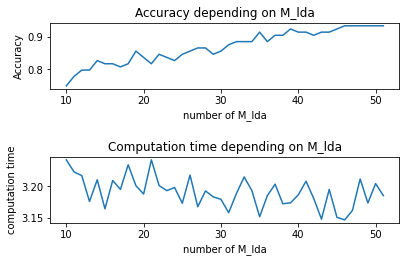

average computation time = 3.1903776838665916


In [47]:
x_axis = list(range(lda_start_num, M_lda+1))
fig_recon, ax_recon = plt.subplots(2,1)
ax_recon[0].plot(x_axis, accuracy_list_lda)
ax_recon[0].set_xlabel("number of M_lda")
ax_recon[0].set_ylabel("Accuracy")
ax_recon[0].set_title(f"Accuracy depending on M_lda")

ax_recon[1].plot(x_axis, computation_time_lda)
ax_recon[1].set_xlabel("number of M_lda")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time depending on M_lda")

fig_recon.tight_layout(pad=2.0)

plt.show()
print(f"average computation time = {np.mean(computation_time_lda)}")

Rank of S_between : 51
Rank of S_within : 364
PCA-LDA computation time = 14.404451131820679
0.9326923076923077


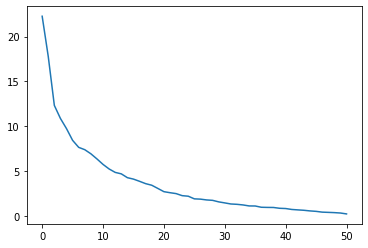

In [51]:
# Caculate accuracy when M_pca == 160
discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, 160, 51)  

x_axis = list(range(0, 51))
plt.plot(x_axis, discriminant_vals)
print(f"PCA-LDA computation time = {comp_time}")

X_train_pca = (X_train - X_bar) @ principal_components_lda
X_test_pca = (X_test - X_test_mean) @ principal_components_lda
result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
print(result)

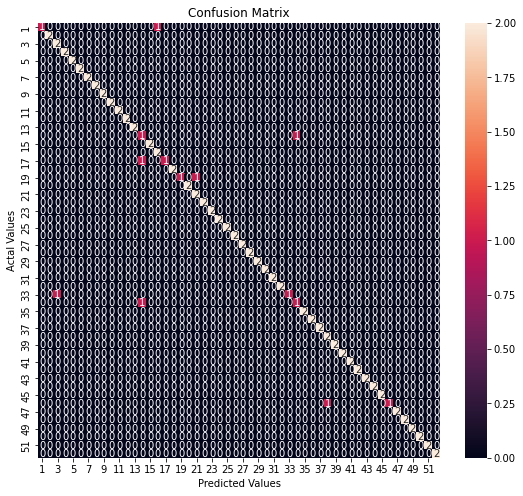

              precision    recall  f1-score   support

           1      1.000     0.500     0.667         2
           2      1.000     1.000     1.000         2
           3      0.667     1.000     0.800         2
           4      1.000     1.000     1.000         2
           5      1.000     1.000     1.000         2
           6      1.000     1.000     1.000         2
           7      1.000     1.000     1.000         2
           8      1.000     1.000     1.000         2
           9      1.000     1.000     1.000         2
          10      1.000     1.000     1.000         2
          11      1.000     1.000     1.000         2
          12      1.000     1.000     1.000         2
          13      1.000     1.000     1.000         2
          14      0.333     0.500     0.400         2
          15      1.000     1.000     1.000         2
          16      0.667     1.000     0.800         2
          17      1.000     0.500     0.667         2
          18      1.000    

In [66]:
# Confushion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = range(1,53), 
                     columns = range(1,53))

#Plotting the confusion matrix
plt.figure(figsize=(9,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

## PCA-LDA Ensemble

In [21]:
from collections import Counter
# PCA first
reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X_train, 415, True) 

def PCA_LDA_ensemble(X, T, M0, M1, Mlda, Fusion): 
  # Randim Subspaces
  pc_M0 = principal_components[:,:M0]
  pc_M1_origin = principal_components[:,M0:]

  scorelist = []
  predictlist = []
  for i in range(T):
    idx = np.random.randint(415-M0, size=M1)
    pc_M1 = pc_M1_origin[:,idx]
    pc_Mpca = np.concatenate((pc_M0, pc_M1), axis=1)
    discriminant_components, discriminant_vals, pc, comp_time = LDA(X, pc_Mpca, Mlda) 

    X_train_pca = (X - X_bar) @ pc  
    X_test_pca = (X_test - X_test_mean) @ pc
    score, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
    scorelist.append(score)
    predictlist.append(y_pred)

  # majority vote
  if (Fusion == 'Majority'):
    predictlist = np.array(predictlist)
    y_pred_voted = []
    for i in range(len(X_test)):
      candidate = predictlist[:,i]
      c = Counter(candidate)
      y_pred_voted.append(c.most_common(1)[0][0])
  # Sum(Avg)
  else:
    pass

  avgError_individual = np.mean(np.array(scorelist))
  Error_committee = accuracy_score(y_test, y_pred_voted)

  return Error_committee, avgError_individual

In [29]:
# hyper-param 바꾸면서 accuracy 측정
# Case_1. Model 수가 10개일 때.

M0_start_num = 50
M1_start_num = 50
com_accuracy_list = []
avg_accuracy_list = []

while M0_start_num + M1_start_num <= 250:
  err_committee, err_individual = PCA_LDA_ensemble(X_train, 10, M0_start_num, M1_start_num, 51, 'Majority')
  com_accuracy_list.append(err_committee)
  avg_accuracy_list.append(err_individual)
  print(f"M_pca : {M1_start_num + 50}/250")
  M1_start_num += 50

print("End of 1st Loop")

M0_start_num = M0_start_num + 50
M1_start_num = 0
com_accuracy_list_2 = []
avg_accuracy_list_2 = []

while M0_start_num + M1_start_num <= 250:
  err_committee, err_individual = PCA_LDA_ensemble(X_train, 10, M0_start_num, M1_start_num, 51, 'Majority')
  com_accuracy_list_2.append(err_committee)
  avg_accuracy_list_2.append(err_individual)
  print(f"M_pca : {M1_start_num + 100}/250")
  M1_start_num += 50

print("End of 2nd Loop")

M0_start_num = M0_start_num + 50
M1_start_num = 0
com_accuracy_list_3 = []
avg_accuracy_list_3 = []

while M0_start_num + M1_start_num <= 250:
  err_committee, err_individual = PCA_LDA_ensemble(X_train, 10, M0_start_num, M1_start_num, 51, 'Majority')
  com_accuracy_list_3.append(err_committee)
  avg_accuracy_list_3.append(err_individual)
  print(f"M_pca : {M1_start_num + 150}/250")
  M1_start_num += 50

rank of feature matrix is 96
rank of feature matrix is 98
rank of feature matrix is 96
rank of feature matrix is 98
rank of feature matrix is 98
rank of feature matrix is 97
rank of feature matrix is 96
rank of feature matrix is 98
rank of feature matrix is 97
rank of feature matrix is 97
M_pca : 100/250
rank of feature matrix is 139
rank of feature matrix is 138
rank of feature matrix is 137
rank of feature matrix is 137
rank of feature matrix is 134
rank of feature matrix is 132
rank of feature matrix is 133
rank of feature matrix is 131
rank of feature matrix is 131
rank of feature matrix is 137
M_pca : 150/250
rank of feature matrix is 173
rank of feature matrix is 171
rank of feature matrix is 173
rank of feature matrix is 173
rank of feature matrix is 176
rank of feature matrix is 169
rank of feature matrix is 174
rank of feature matrix is 171
rank of feature matrix is 176
rank of feature matrix is 180
M_pca : 200/250
rank of feature matrix is 208
rank of feature matrix is 203
ra

End of 3rd Loop


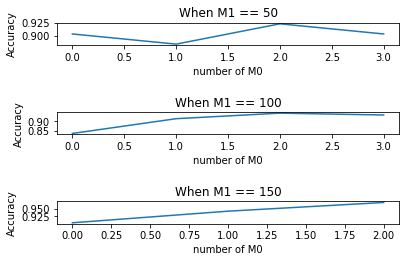

In [33]:
x_axis = list(range(0, 4))
fig_recon, ax_recon = plt.subplots(3,1)
ax_recon[0].plot(x_axis, com_accuracy_list)
ax_recon[0].set_xlabel("number of M0")
ax_recon[0].set_ylabel("Accuracy")
ax_recon[0].set_title("When M1 == 50")

x_axis = list(range(0, 4))
ax_recon[1].plot(x_axis, com_accuracy_list_2)
ax_recon[1].set_xlabel("number of M0")
ax_recon[1].set_ylabel("Accuracy")
ax_recon[1].set_title("When M1 == 100")

x_axis = list(range(0, 3))
ax_recon[2].plot(x_axis, com_accuracy_list_3)
ax_recon[2].set_xlabel("number of M0")
ax_recon[2].set_ylabel("Accuracy")
ax_recon[2].set_title("When M1 == 150")

print("End of 3rd Loop")

fig_recon.tight_layout(pad=2.0)

plt.show()

In [36]:
print(max(com_accuracy_list))
print(max(com_accuracy_list_2))
print(max(com_accuracy_list_3))

0.9230769230769231
0.9423076923076923
0.9711538461538461
